In [1]:
import pandas as pd
import numpy as np

vinb = pd.read_csv("vinb2.txt", sep="\t", header=0, encoding= 'utf-8', parse_dates = ["Date"])

In [2]:
import datetime

#creat start and endtimes for the below loop which will count tweets per 5 minute blocks
starttime = datetime.datetime(2015, 06, 24, 20, 40, 00)  
endtime = datetime.datetime(2015, 06, 24, 23, 15, 00)
print starttime

2015-06-24 20:40:00


In [3]:
from datetime import timedelta
#firstweet and lasttweet will be used as 5min blocks, a count of all tweets sent in that block will be added to a dictionary.
#checking here how to add time
firsttweet = starttime
print firsttweet + datetime.timedelta(minutes = 5)

2015-06-24 20:45:00


There is a time discrepancy with the tweets, their recorded time is one hour ahead of the actual time they were sent at ie, the recorded time for the earliest tweets is 21.00, where as the show started at 22.00 GMT. Below this time discrepancy is corrected (so that the correct time will appear on the graph) by adding 1 hour to the time before it is recoreded in the dictionary. I found it was easier to do it here.

Also, the date is left in with the time to prevent the few tweets sent on/after 00:00 being placed at the start when the dataframe is sorted in the next block. 

In [4]:
import re #for regex to make searching each tweet for keywords easier.

#dictionarys to hold tweets in various catagories
tweets_count = {}
healy_count = {}
martin_sf_count = {}
brendan_fg_count = {}
fianna_count = {}
post_office_count = {}
grant_count = {}
ind_count = {}

hat_count = {}

#create a list of keywords for each catagory. Any tweet containing healy, rae, michael or healyrae will count as 1 for healy_count
healy_text = ["healy", "rae", "healyrae", "michael", "johnny"]
martin_sf_text = ["ferris", "martin", "sf", "sinn", "fein", "ferrismartin", "sinnfein"]
brendan_fg_text = ["brendan", "griffin", "griffen", "fine", "gael", "fg", "finegael", "bgriffintd"]
fianna_text = ["fianna", "FF", "fiannafail", "norma"] #including mentions of Norma Foley
post_text = ["post"]
grant_text = ["grant", "thornton"]
ind_text = ["independence", "1916"]

firsttweet = starttime
lasttweet = starttime + datetime.timedelta(minutes = 5)

while firsttweet < endtime:
    five_min_block = vinb[(vinb.Date >= firsttweet) & (vinb.Date < lasttweet)]
    corrected_hour = firsttweet + datetime.timedelta(hours = 1)
    
    healy = 0
    sf = 0
    fg = 0
    ff = 0
    post = 0
    grant = 0
    ind = 0
        
    for tweet in five_min_block.Text: #for each tweet in the current 5 min block
        
        tweet = tweet.lower()
        tweet = letters_only = re.sub("[^a-zA-Z(1916)]", " ", tweet) #remove anything that isn't a letter or the year 1916
        
        
        for keyword in healy_text:
            if keyword in tweet.split():
                healy += 1
                break
        for keyword in martin_sf_text:
            if keyword in tweet.split():
                sf+=1
                break
        for keyword in brendan_fg_text:
            if keyword in tweet.split():
                fg+=1
                break
        for keyword in fianna_text:
            if keyword in tweet.split():
                ff+=1
                break
        for keyword in post_text:
            if keyword in tweet.split():
                post+=1
                break
        for keyword in grant_text:
            if keyword in tweet.split():
                grant+=1
                break
        for keyword in ind_text:
            if keyword in tweet.split():
                ind+=1
                break
 
    #add the corrected time and the figure for that 5 min block to each directory
    tweets_count[corrected_hour] = len(five_min_block)
    healy_count[corrected_hour] = healy
    martin_sf_count[corrected_hour] = sf
    brendan_fg_count[corrected_hour] = fg
    fianna_count[corrected_hour] = ff
    post_office_count[corrected_hour] = post
    grant_count[corrected_hour] = grant
    ind_count[corrected_hour] = ind
        
    #increment first and last tweet for next run
    firsttweet += datetime.timedelta(minutes = 5)
    lasttweet += datetime.timedelta(minutes = 5)

In [5]:
#convert the dictionaries to dataframes and then merge them. Is there a "better"/more pythonic way of doing this?
total_db = pd.DataFrame(tweets_count.items(), columns = ["Date", "Tweets"]) 
healy_db = pd.DataFrame(healy_count.items(), columns = ["Date", "HR Tweets"]) 
sf_db = pd.DataFrame(martin_sf_count.items(), columns = ["Date", "SF Tweets"])
ff_db = pd.DataFrame(fianna_count.items(), columns = ["Date", "FF Tweets"])
post_db = pd.DataFrame(post_office_count.items(), columns = ["Date", "PO Tweets"])
fg_db = pd.DataFrame(brendan_fg_count.items(), columns = ["Date", "FG Tweets"])
grant_db = pd.DataFrame(grant_count.items(), columns = ["Date", "GT Tweets"])
ind_db = pd.DataFrame(ind_count.items(), columns = ["Date", "Ind Tweets"])


full_db = pd.merge(total_db, healy_db, on="Date").merge(sf_db, on="Date").merge(post_db, on="Date").merge(fg_db, on="Date").merge(grant_db, on="Date").merge(ind_db, on="Date").merge(ff_db, on="Date")

full_tweets = full_db.sort(columns=["Date"], ascending = 1) #sort sort merged dataframe by date
full_tweets.head()

,Date,Tweets,HR Tweets,SF Tweets,PO Tweets,FG Tweets,GT Tweets,Ind Tweets,FF Tweets
30,2015-06-24 21:40:00,2,0,0,0,0,0,0,0
24,2015-06-24 21:45:00,0,0,0,0,0,0,0,0
23,2015-06-24 21:50:00,2,0,0,0,0,0,0,0
18,2015-06-24 21:55:00,3,0,0,0,0,0,0,0
20,2015-06-24 22:00:00,22,2,1,0,1,0,0,0


With the below graph it is important to note that keywords from multiple different catagories could be in a single tweet, ie "Michael Healy-Rae says he celebrates our independence every day!" would be +1 for the healy-rae line and +1 for the independence/1916 line

Populating the interactive namespace from numpy and matplotlib


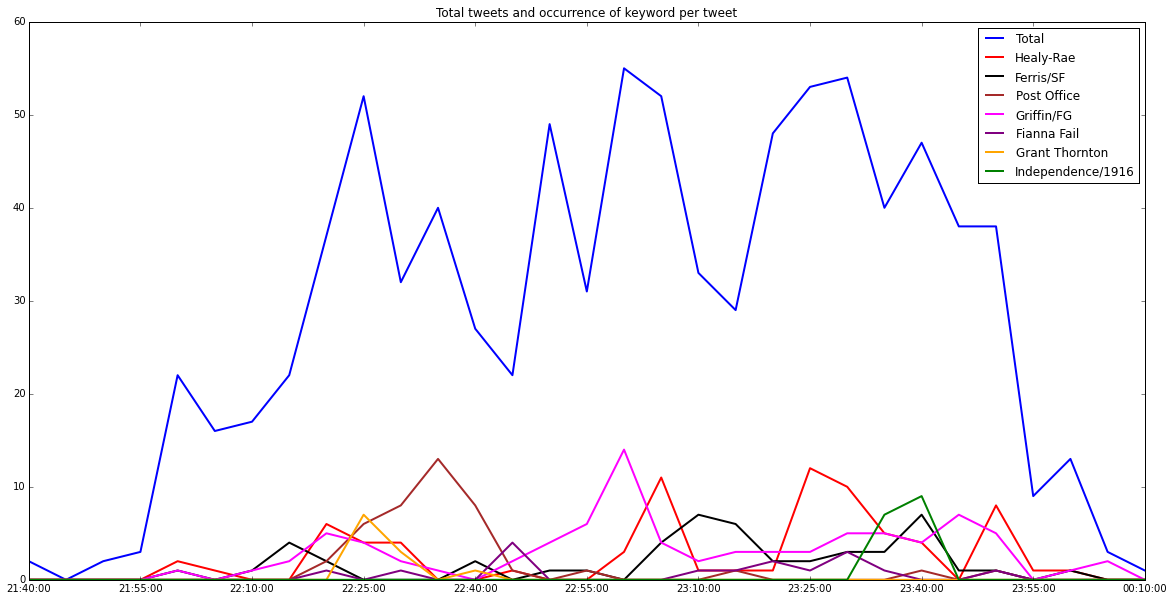

In [6]:
import matplotlib.pyplot as plt
%pylab inline

#plt.xkcd() 

plt.figure(figsize=(20,10))
plt.title("Total tweets and occurrence of keyword per tweet")
plt.plot(full_tweets["Date"], full_tweets["Tweets"], color = 'blue', label="Total", linewidth=2)
plt.plot(full_tweets["Date"], full_tweets["HR Tweets"], color = 'red', label = "Healy-Rae", linewidth=2)
plt.plot(full_tweets["Date"], full_tweets["SF Tweets"], color = 'black', label = "Ferris/SF", linewidth=2)
plt.plot(full_tweets["Date"], full_tweets["PO Tweets"], color = 'brown', label = "Post Office", linewidth=2)
plt.plot(full_tweets["Date"], full_tweets["FG Tweets"], color = 'magenta', label = "Griffin/FG", linewidth=2)
plt.plot(full_tweets["Date"], full_tweets["FF Tweets"], color = 'purple', label = "Fianna Fail", linewidth=2)
plt.plot(full_tweets["Date"], full_tweets["GT Tweets"], color = 'orange', label = "Grant Thornton", linewidth=2)
plt.plot(full_tweets["Date"], full_tweets["Ind Tweets"], color= 'green', label = "Independence/1916", linewidth=2)
plt.legend()

plt.show()

In [7]:
"""
Remember to subtract 1 hour from the above graph! Peak at c 23.05 is "22, 05, 00" in the vinb dataset
Uncomment any of the #vinb[vinb.Date... lines to display the tweets sent before that time
"""
#vinb[vinb.Date < datetime.datetime(2015, 06, 24, 21, 25, 00)]
#22.25 peak
#Michael Healy-Rae, his cap and post offices

#vinb[vinb.Date < datetime.datetime(2015, 06, 24, 21, 50, 00)] 
#22.50 peak
#Health, cancer patient Jackie Crowe, HSE

#vinb[vinb.Date < datetime.datetime(2015, 06, 24, 22, 05, 00)]
#23.05 - 23.08 peak
#seems to be mostly around the lone parent cuts, FG/Griffin tweets are both about his decision to vote with the party on 
#matters he disagrees with but also FG in general and also on FG and the Greece situation.
#More metions of Healy-Rae.

#vinb[vinb.Date < datetime.datetime(2015, 06, 24, 22, 30, 00)] 
#23.30 peak
#Johnny Healy-Rae. That is all
#"Jayas! Is that another Healy-Rae!!!", "Is he Jackie Healy-Rae's grandson...", "Johnny Healy-Rae takes to the stage #Vinb", "oh god #healy-rae junior ! not another 1"

#vinb[vinb.Date < datetime.datetime(2015, 06, 24, 22, 40, 00)]
#23.40 spike
#References to the arguement between Browne and Ferris which was cut from the show
#"No Ferris vs Vinny scrap?", "Is this the scrap with Ferris and #vinb?"
#and also the statement made by a member of the audience about Ireland's Independence day 

'\nRemember to subtract 1 hour from the above graph! Peak at c 23.05 is "22, 05, 00" in the vinb dataset\nUncomment any of the #vinb[vinb.Date... lines to display the tweets sent before that time\n'

In [8]:
vinb[vinb.Date < datetime.datetime(2015, 06, 24, 22, 30, 00)] 

,User,Text,Date,Retweet Count,Reply To
258,IERepublican,SF are a wholly transformed party? Let's all j...,2015-06-24 22:29:59,0,None
259,RayMcGrath,Is he Jackie Healy-Rae's grandson or his reinc...,2015-06-24 22:29:55,0,None
260,Evanis,Johnny Healy-Rae takes to the stage #Vinb,2015-06-24 22:29:53,0,None
261,phonsiefonz,#vinb the banks are broke !,2015-06-24 22:29:46,1,None
262,losthighroller,Fair play to the people of Kerry on #vinb You ...,2015-06-24 22:29:44,0,None
263,joe905x,"oh god #healy-rae junior ! not another 1 , #Da...",2015-06-24 22:29:42,0,None
264,TonightWithVinB,“The problem we have with our politicians is t...,2015-06-24 22:29:29,2,None
265,daraghk7,#vinb sounds like we are in Healy Rae country,2015-06-24 22:29:24,0,None
266,sbreathnach4,#vinb @rte @DailyPlato It now appears that the...,2015-06-24 22:29:24,0,None
267,DjMakG,I really think tonight's #vinb need's subtitle...,2015-06-24 22:29:23,0,None
